In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
import statsmodels.api as sm
cf.go_offline()
%matplotlib inline

# Loading Data Info

In [2]:
data_info = pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
# Function to provide column definitions

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


# Loading Data and EDA

In [6]:
df = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
df['pub_rec'].nunique()

20

/opt/anaconda3/envs/pythoncourse/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='loan_status', ylabel='count'>

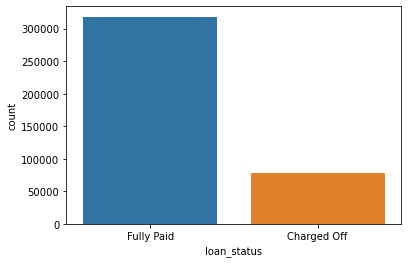

In [12]:
# Outcome Variable Countplot

sns.countplot('loan_status',data=df)

In [13]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


/opt/anaconda3/envs/pythoncourse/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='loan_amnt'>

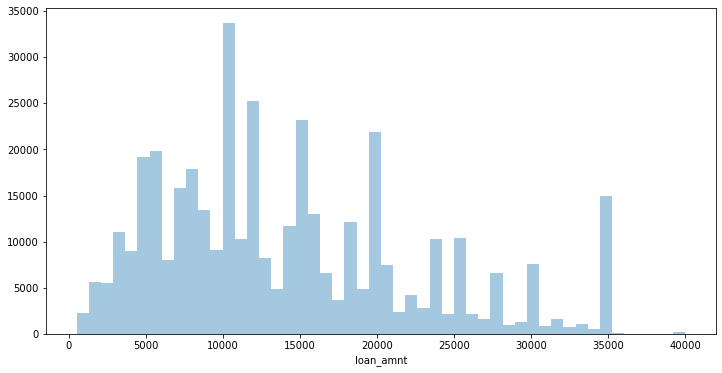

In [14]:
# Loan Amounts

plt.figure(figsize=(12,6))

sns.distplot(df['loan_amnt'],bins=50,kde=False)

<AxesSubplot:>

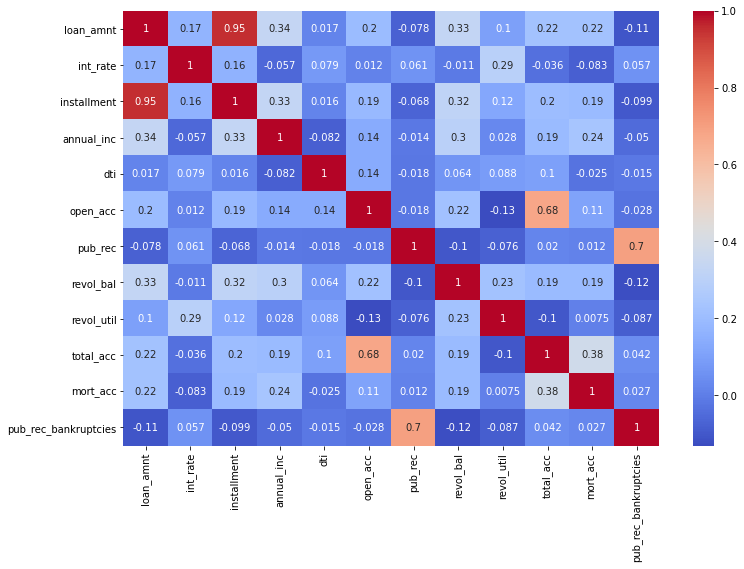

In [15]:
# Checking Correlations

plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [16]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

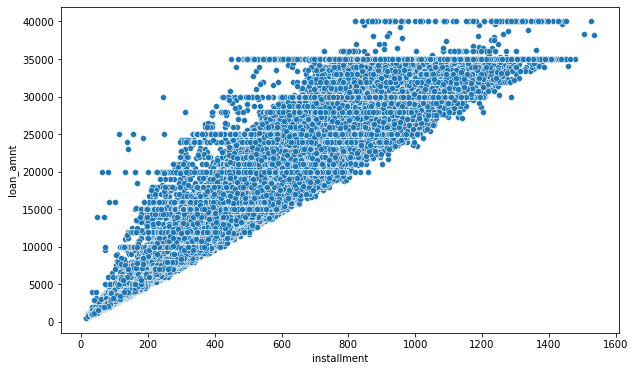

In [17]:
#Checking Installment/amnt Corr

plt.figure(figsize=(10,6))

sns.scatterplot(x='installment',y='loan_amnt',data=df)

#Weird

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

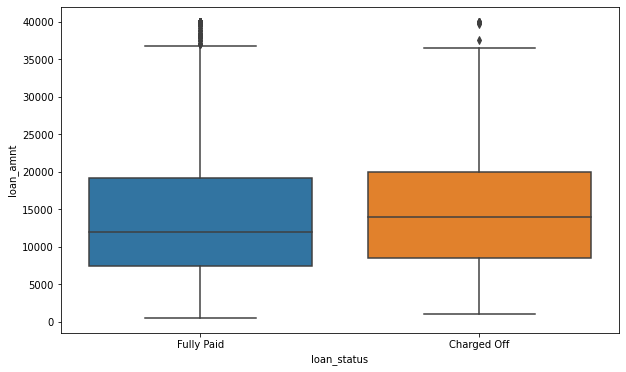

In [18]:
#loan amount vs outcome variable

plt.figure(figsize=(10,6))

sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [19]:
# loan amount summary stats grouped by status

df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

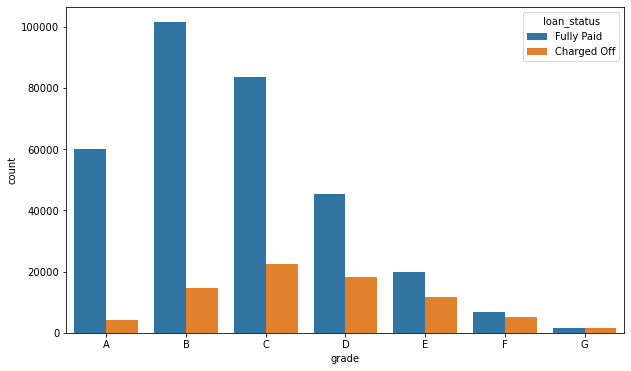

In [22]:
#Eploring Grades

plt.figure(figsize=(10,6))

sns.countplot(x='grade',data=df,hue='loan_status',order=sorted(df['grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

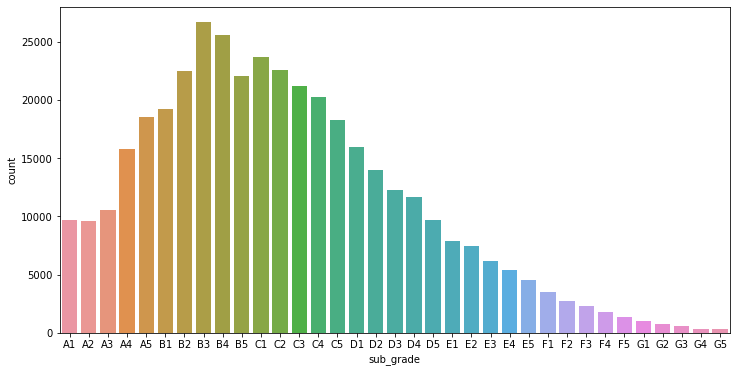

In [23]:
plt.figure(figsize=(12,6))

sns.countplot(data=df,x='sub_grade',
              order=sorted(df['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

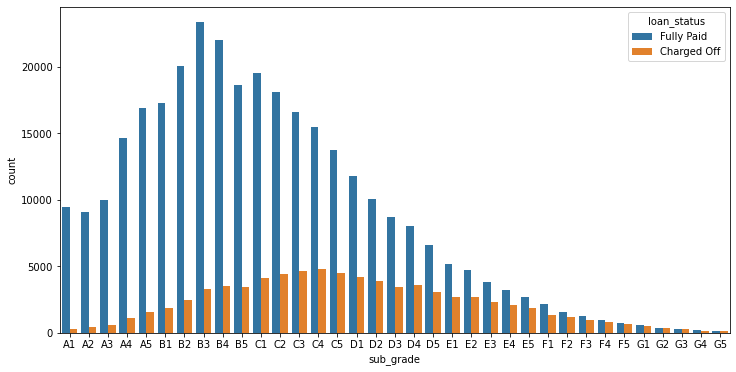

In [24]:
plt.figure(figsize=(12,6))

sns.countplot(data=df,x='sub_grade',
              order=sorted(df['sub_grade'].unique()),
             hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

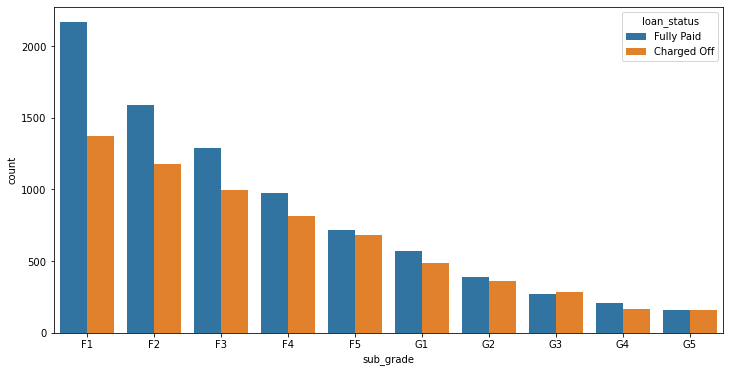

In [25]:
plt.figure(figsize=(12,6))

sns.countplot(data=df[(df['grade']=='G') | (df['grade']=='F')],
             x='sub_grade',hue='loan_status',
             order=sorted(df[(df['grade']=='G') | (df['grade']=='F')]['sub_grade'].unique()))

In [26]:
# Create Loan Status Dummy

df = pd.get_dummies(data=df,columns=['loan_status'],drop_first=True)

In [27]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_status_Fully Paid'],
      dtype='object')

In [28]:
# Renaming loan status dummy loan_repaid

df.rename(columns={'loan_status_Fully Paid': 'loan_repaid'},inplace=True)

<AxesSubplot:>

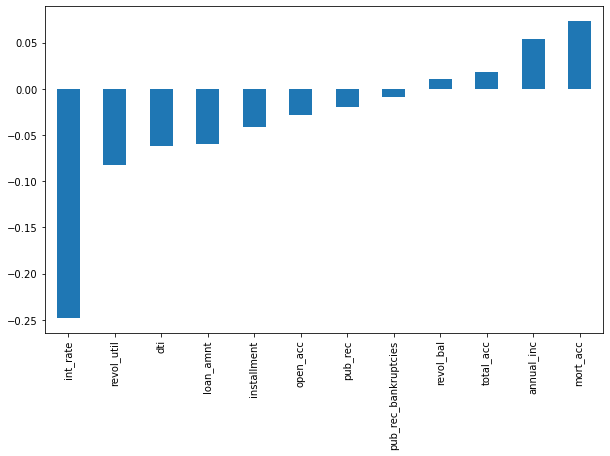

In [29]:
# Numeric feature correlations with loan dummy

plt.figure(figsize=(10,6))

df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

# Missing Data and Feature Engineering

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [31]:
len(df)

396030

In [32]:
# Checking Missing Values

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [34]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
df['emp_title'].nunique()

173105

In [36]:
# Dropping emp title (too many to convert to dummy)

df.drop('emp_title',axis=1,inplace=True)

In [37]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

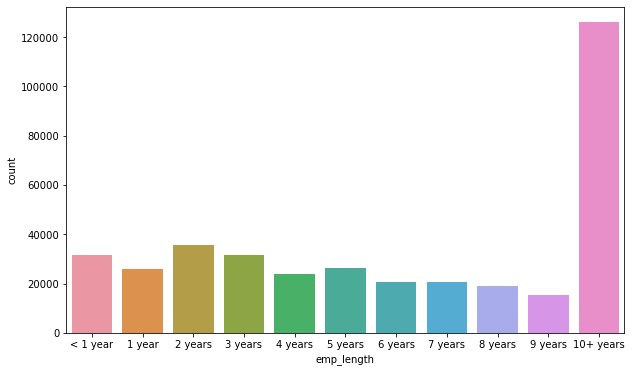

In [38]:
# count plot employment length

plt.figure(figsize=(10,6))

sns.countplot(data=df,x='emp_length',
              order=['< 1 year','1 year','2 years','3 years','4 years', '5 years', '6 years', '7 years', '8 years',
                    '9 years', '10+ years'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

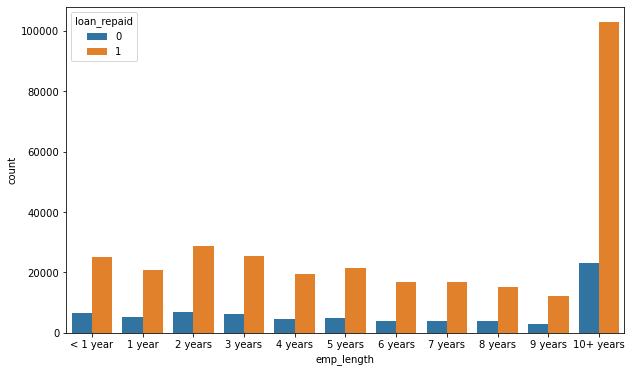

In [39]:
plt.figure(figsize=(10,6))

sns.countplot(data=df,x='emp_length',
              order=['< 1 year','1 year','2 years','3 years','4 years', '5 years', '6 years', '7 years', '8 years',
                    '9 years', '10+ years'],
             hue='loan_repaid')

In [40]:
df[df['loan_repaid']==0]['emp_length'].value_counts()/df['emp_length'].value_counts()

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

In [41]:
df_charge_off_pct = df[df['loan_repaid']==0]['emp_length'].value_counts()/df['emp_length'].value_counts()

<AxesSubplot:>

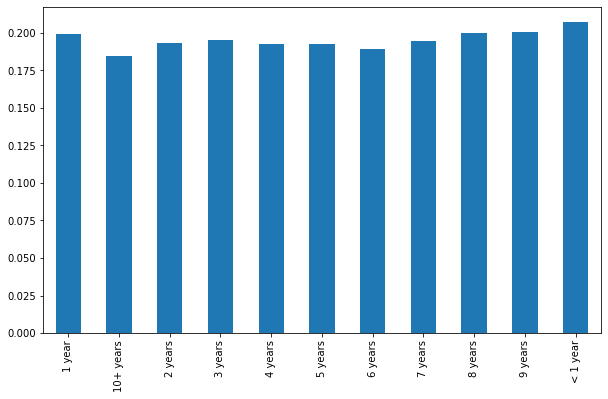

In [42]:
#Employemnt length percent charged off

plt.figure(figsize=(10,6))

df_charge_off_pct.plot(kind='bar')

In [43]:
# Drop Employment length, charge offs very similar across categories

df.drop('emp_length',axis=1,inplace=True)

In [44]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [46]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [47]:
# Drop title, it's the same as purpose

df.drop('title',axis=1,inplace=True)

In [48]:
feat_info('mort_acc')

Number of mortgage accounts.


In [49]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:>

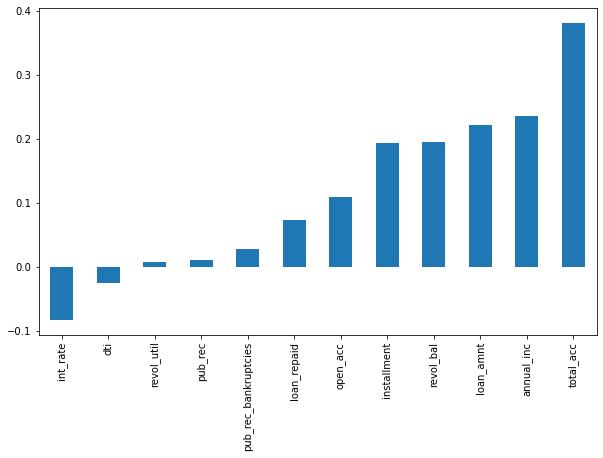

In [50]:
# Checking Correlations between mort_acc and other variable

plt.figure(figsize=(10,6))

df.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='bar')

In [51]:
df['mort_acc'].groupby(df['total_acc']).mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [52]:
total_acc_avg = df['mort_acc'].groupby(df['total_acc']).mean()

In [53]:
total_acc_avg[6.0]

0.15129310344827587

In [54]:
#Function to fill in mort_acc with average based on total_acc

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [55]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']),axis=1)

In [56]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [57]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


<AxesSubplot:>

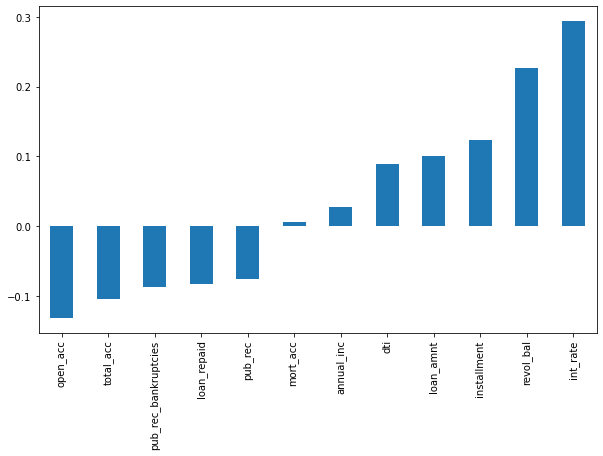

In [58]:
plt.figure(figsize=(10,6))

df.corr()['revol_util'].drop('revol_util').sort_values().plot(kind='bar')

In [59]:
df['int_rate'].nunique()

566

In [60]:
int_avg = df['revol_util'].groupby(df['int_rate']).mean()

In [61]:
# Filling in revol_util missing Vals

def fill_revol_util(int_rate,revol_util):
    if np.isnan(revol_util):
        return int_avg[int_rate]
    else:
        return revol_util

In [62]:
df['revol_util']=df.apply(lambda x: fill_revol_util(x['int_rate'], x['revol_util']),axis=1)

In [63]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

<AxesSubplot:>

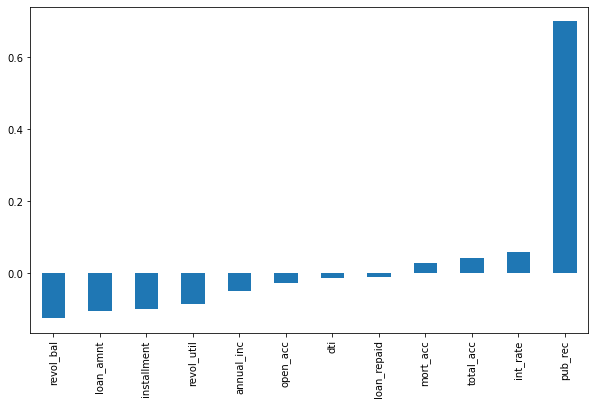

In [64]:
# Bankruptcies Correlations

plt.figure(figsize=(10,6))

df.corr()['pub_rec_bankruptcies'].drop('pub_rec_bankruptcies').sort_values().plot(kind='bar')

In [65]:
df['pub_rec_bankruptcies'].groupby(df['pub_rec']).mean()

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [66]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [67]:
avg_bankruptcies = df['pub_rec_bankruptcies'].groupby(df['pub_rec']).mean()

In [68]:
# Filling in missing bankruptcy values

def fill_bankruptcies(pub_rec,pub_rec_bankruptcies):
    if np.isnan(pub_rec_bankruptcies):
        return avg_bankruptcies[pub_rec]
    else:
        return pub_rec_bankruptcies

In [69]:
df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_bankruptcies(x['pub_rec'], x['pub_rec_bankruptcies']),axis=1)

In [70]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [72]:
# COnverting term to an integer value

df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [73]:
df.drop('grade',axis=1,inplace=True)

In [74]:
# Making Subfgrade dummies

df = pd.get_dummies(df,columns=['sub_grade'],drop_first=True)

In [75]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [76]:
df = pd.get_dummies(df,columns=['verification_status','initial_list_status','purpose'],drop_first=True)

In [77]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line', 'application_type',
       'address'],
      dtype='object')

In [78]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [79]:
df['home_ownership'] = df['home_ownership'].replace(['ANY','NONE'],'OTHER')

In [80]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [81]:
#Making home ownership dummies

df = pd.get_dummies(df,columns=['home_ownership'],drop_first=True)

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'purpose_c

In [83]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'earliest_cr_line', 'application_type', 'address'], dtype='object')

In [84]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [85]:
# Extracting zip from address

df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [86]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [87]:
# Zip code dummies

df = pd.get_dummies(df,columns=['zip_code'])

In [88]:
df.drop('address',axis=1,inplace=True)

In [89]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'earliest_cr_line', 'application_type'], dtype='object')

In [90]:
# Drop issue data, leaky Data

df.drop('issue_d',axis=1,inplace=True)

In [91]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [92]:
# Application Type Dummies

df = pd.get_dummies(df,columns=['application_type'],drop_first=True)

In [93]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [94]:
# Extract year from earliest credit line

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [95]:
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [96]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   revol_util                           396030 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

# Model Creation

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)

In [104]:
X_test = scaler.transform(X_test)

In [105]:
import tensorflow as tf

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [107]:
X_train.shape

(316824, 79)

In [108]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20,restore_best_weights=True)

In [109]:
log_directory = 'logs/fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [110]:
model = Sequential()

model.add(tf.keras.Input(shape = (79)))

model.add(Dense(79,activation='relu',use_bias=True))
model.add(Dropout(0.45))

model.add(Dense(39,activation='relu',use_bias=True))
model.add(Dropout(0.25))

model.add(Dense(19,activation='relu',use_bias=True))
model.add(Dropout(0.1))

model.add(Dense(9,activation='relu',use_bias=True))
#model.add(Dropout(0.1))

model.add(Dense(4,activation='relu',use_bias=True))
#model.add(Dropout(0.0))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [111]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=5000,callbacks=[early_stop,board],batch_size=258)

Epoch 1/5000
   1/1228 [..............................] - ETA: 0s - loss: 0.6776WARNING:tensorflow:From /opt/anaconda3/envs/pythoncourse/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1228/1228 [==============================] - 2s 2ms/step - loss: 0.3383 - val_loss: 0.2985
Epoch 2/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2943 - val_loss: 0.2812
Epoch 3/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2803 - val_loss: 0.2729
Epoch 4/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2730 - val_loss: 0.2679
Epoch 5/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2693 - val_loss: 0.2666
Epoch 6/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2671 - val_loss: 0.2633
Epoch 7/5

Epoch 74/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2558 - val_loss: 0.2570
Epoch 75/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2557 - val_loss: 0.2572
Epoch 76/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2559 - val_loss: 0.2569
Epoch 77/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2558 - val_loss: 0.2573
Epoch 78/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2559 - val_loss: 0.2568
Epoch 79/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2557 - val_loss: 0.2573
Epoch 80/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2557 - val_loss: 0.2577
Epoch 81/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2556 - val_loss: 0.2572
Epoch 82/5000
1228/1228 [==============================] - 2s 2ms/step - loss: 0.2555 - val_loss: 0.2570
Epoch 83/5000
1228/1228 [==============================

In [112]:
model.save('Loan_Repayment_Model.h5')

# Model Evaluation

<AxesSubplot:>

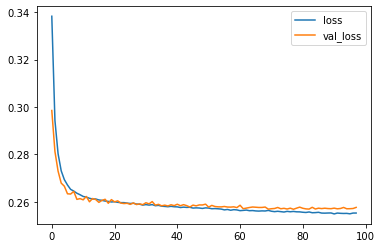

In [113]:
pd.DataFrame(model.history.history).plot()

In [114]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [115]:
from sklearn.metrics import confusion_matrix,classification_report

In [116]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6828  8665]
 [  102 63611]]


              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [117]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                      16000.00
term                              60.00
int_rate                          21.99
installment                      441.82
annual_inc                     68000.00
                                 ...   
zip_code_86630                     0.00
zip_code_93700                     0.00
application_type_INDIVIDUAL        1.00
application_type_JOINT             0.00
earliest_cr_year                2000.00
Name: 210497, Length: 79, dtype: float64

In [118]:
new_customer = scaler.transform(new_customer.values.reshape(-1,79))

In [119]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [120]:
df['loan_repaid'].iloc[random_ind]

1

In [121]:
pwd

'/Users/hindszach/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning'

In [122]:
#tensorboard --logdir logs/fit